**Since the lockdown from the pandemic, more and more people are traveling across the country and all over the world whether it’s for pleasure or for work. Regardless of our purpose, inflight wifi connectivity and the experience of that connectivity is a part of our travel experience as we rely on it for work, entertainment, and social media. On long flights, this could mean 5-6 hours+ of productive work time and on short flights it could mean watching that movie that you haven’t had the time for.**  

**Having a smooth wifi experience is important as a traveler to turn travel time into productivity/entertainment time and a means for airliners to attract and retain customers.**

**Our goal is to determine if there are any differences between the groups of short (<1200 miles), medium (1200-2400 miles), long distance travelers (2400+).**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from scipy import stats
drive.mount('/drive')

#import data
url1 = 'https://raw.githubusercontent.com/mhvoodoo/data_sets/main/Airline_test.csv'
air_dat = pd.read_csv(url1)

#drops null values in column of interest
air_dat['Inflight wifi service'].dropna()
air_dat.head()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


**In the following sections, our ultimate goal is to test to see if there are any significant difference in these 3 groups: short, medium, and long distance travelers.**

**H0: The groups (short, medium, long flight travelers) have no signicant difference**

**Ha: The at least 2 of the groups have statistically significant difference.**

**First, we'll split the data and then test for normality.**

In [ ]:
#split data into 3 groups short (<1200), medium (1200-2400), and long (2400+)

medium = air_dat[(air_dat['Flight Distance'] >1200) & (air_dat['Flight Distance'] <=2400)]
short = air_dat[air_dat['Flight Distance'] <=1200]
longflight = air_dat[air_dat['Flight Distance'] >2400]

In [ ]:
print(stats.describe(short['Inflight wifi service']))
print(stats.describe(medium['Inflight wifi service']))
print(stats.describe(longflight['Inflight wifi service']))

DescribeResult(nobs=16794, minmax=(0, 5), mean=2.7191854233654875, variance=1.7060488570589911, skewness=0.025591488079265742, kurtosis=-0.7912173845744168)
DescribeResult(nobs=5135, minmax=(0, 5), mean=2.7409931840311588, variance=1.8425245295600778, skewness=0.08096098884091088, kurtosis=-0.9475342718548618)
DescribeResult(nobs=4047, minmax=(0, 5), mean=2.727205337286879, variance=2.0288765922799596, skewness=0.04123947642005879, kurtosis=-1.0118174879090596)


**Kurtosis is ~1.9 and is potentially workable for further testing. We'll start with Shapiro's test for normality.**

In [ ]:
#checking number of data inputs in order to proceed with Shapiros
print('Number of data inputs for short is {}, medium is {}, and long flights is {}.'.format(len(short),len(medium), len(longflight)))

Number of data inputs for short is 16794, medium is 5135, and long flights is 4047.


In [ ]:
for i in air_dat['Inflight wifi service']:
  if i == 1.5:
    print('y')

**Shapiro works well with ~5000 data points or less and maybe unreliable with more data points but we'll go ahead and perform the test.**

In [ ]:
print(stats.shapiro(short['Inflight wifi service']))
print(stats.shapiro(medium['Inflight wifi service']))
print(stats.shapiro(longflight['Inflight wifi service']))

ShapiroResult(statistic=0.933365523815155, pvalue=0.0)
ShapiroResult(statistic=0.9257660508155823, pvalue=8.407790785948902e-45)
ShapiroResult(statistic=0.9252941012382507, pvalue=6.087240529027005e-41)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Shapiro's yielded that this data is normal but since there are too many data points, the results could potentially be unreliable so we'll look at histograms and determine normality visually.**

Text(0.5, 0.98, 'Frequency of Rating in Short, Medium, Long Flights')

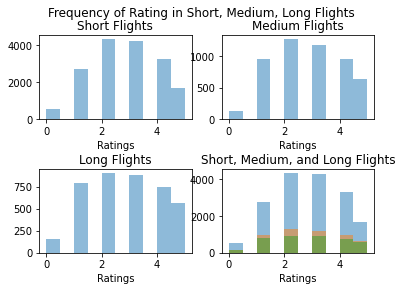

In [ ]:
#check for normality in data sets visually via histgrams

fig, axs = plt.subplots(2, 2,gridspec_kw={'hspace': .6})
axs[0, 0].hist(short['Inflight wifi service'], alpha = .5, label = 'short flights')
axs[0, 0].set_title('Short Flights')
axs[0, 0].set(xlabel='Ratings')
axs[0, 1].hist(medium['Inflight wifi service'], alpha = .5,label = 'medium flights')
axs[0, 1].set_title('Medium Flights')
axs[0, 1].set(xlabel='Ratings')
axs[1, 0].hist(longflight['Inflight wifi service'], alpha = .5,label = 'long flights')
axs[1, 0].set_title('Long Flights')
axs[1, 0].set(xlabel='Ratings')
axs[1, 1].hist(short['Inflight wifi service'], alpha = .5, label = 'short flights')
axs[1, 1].hist(medium['Inflight wifi service'], alpha = .5,label = 'medium flights')
axs[1, 1].set(xlabel='Ratings')
axs[1, 1].hist(longflight['Inflight wifi service'], alpha = .5,label = 'long flights')
axs[1, 1].set_title('Short, Medium, and Long Flights')

fig.suptitle('Frequency of Rating in Short, Medium, Long Flights')



**All data sets seem to be normal from looking at its histograms.**

In [ ]:
#run one way anova on all data sets 
stats.f_oneway(
    short['Inflight wifi service'],
    medium['Inflight wifi service'],
    longflight['Inflight wifi service'])

F_onewayResult(statistic=0.5325025619538769, pvalue=0.5871402007676697)

The mean for short, medium, long flights are 2.7191854233654875, 2.7409931840311588, 2.727205337286879 respectively


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


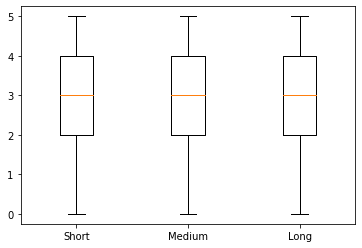

In [ ]:
plt.boxplot([short['Inflight wifi service'],medium['Inflight wifi service'],longflight['Inflight wifi service']],)
plt.xticks([1, 2, 3], ['Short', 'Medium', 'Long'])
#ignore warmings, array occurs as intended
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

print('The mean for short, medium, long flights are {}, {}, {} respectively'.format(short['Inflight wifi service'].mean(), 
  medium['Inflight wifi service'].mean(), 
  longflight['Inflight wifi service'].mean()))  

**One-way ANOVA yields results with pvalue of 0.5871 > .05 and a visual assesment of the means via boxplot shows very little differences. Therefore,  we *fail to reject the null hypothesis*-- there is no significant difference in the groups.**

**Now we still assess the pairwise statistics with Tukey's to see if it yield and unexpected differences amongst the pairs.**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#putting dataframe in format that will be easily fed into Tukeys
#add column with the different categories short, medium, long
short['duration'] = 'short'
medium['duration'] = 'medium'
longflight['duration'] = 'long'

#appending all the data into 1 data frame
all = short.append(medium, ignore_index=True)
all = all.append(longflight,ignore_index=True)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Se

In [ ]:
tukey = pairwise_tukeyhsd(endog = all['Inflight wifi service'],      
                          groups = all['duration'],             
                          alpha=0.05) 

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
long,medium,0.0138,0.8625,-0.052,0.0796,False
long,short,-0.008,0.9,-0.0628,0.0468,False
medium,short,-0.0218,0.5577,-0.0717,0.0281,False


**With a pvalue of 0.5871 from the ANOVA and the Tukey's pvalue of 0.8625, 0.9, and 0.5577, we fail to reject the null hypothesis and conclude that there are no significant difference between these groups.**

**Recommendation**

**Since the divided groups doesn't show any significant statistical difference, conclude that travel distance does not affect passenger's satisfaction ratings towards wifi. Therefore, as a future study, we recommend assessing other factors that might drive wifi ratings in order to improve wifi satisfaction measures.**  